# CHEM7370 Class 12
## Visualizing p orbitals
An orbital is a wavefunction for one electron. In the hydrogen atom, there is only one electron so the entire electronic wavefunction is an orbital, and the only atom for which we have explicit formulas for orbitals is the hydrogen atom. For many-electron atoms or molecules, we can only approximately assign electrons to individual orbitals (we can get these orbitals by solving Hartree-Fock or Kohn-Sham equations), so molecular orbitals are a model that is not exactly correct, but very useful nonetheless. None of it matters for today's class though...

Today, our goal is to visualize the orbitals for a hydrogen atom, focusing specifically on the *2p* and *3p* orbitals. We have seen many orbital pictures, but do we *really* understand what they represent? The reason visualizing orbitals is tricky is because we are dealing with a function of three variables, *f(x,y,z)*. 
* We can graph a function of one variable *f(x)* on a 2D plot.
* We can graph a function of two variables *f(x,y)* on a 3D surface plot.
* We can graph a function of three variables *f(x,y,z)* on a... 4D plot?

This probably won't work, so instead we will explore two different ways of visualizing orbitals: 
* graphing a 2D slice *f(x,y)* on a contour or surface plot,
* graphing an orbital contour (isosurface) on a 3D plot.

Here are some formulas for the hydrogen atom orbitals as functions of *(x,y,z)*, expressed in atomic units:
* *2p<sub>x</sub>=(32π)<sup>-1/2</sup>xe<sup>-r/2</sup>*
* *2p<sub>y</sub>=(32π)<sup>-1/2</sup>ye<sup>-r/2</sup>*
* *2p<sub>z</sub>=(32π)<sup>-1/2</sup>ze<sup>-r/2</sup>*
* *3p<sub>x</sub>=(1/81)(2/π)<sup>1/2</sup>x(6-r)e<sup>-r/3</sup>*
* *3p<sub>y</sub>=(1/81)(2/π)<sup>1/2</sup>y(6-r)e<sup>-r/3</sup>*
* *3p<sub>z</sub>=(1/81)(2/π)<sup>1/2</sup>z(6-r)e<sup>-r/3</sup>*

where *r=(x<sup>2</sup>+y<sup>2</sup>+z<sup>2</sup>)<sup>1/2</sup>* is the distance from the nucleus (located at *(0,0,0)*). The number at the very front is a *normalization constant* - the square of a normalized orbital represents the probability density of finding an electron at different locations, and a probability density integrated over the entire 3D space has to give 1 - the probability of finding an electron anywhere in space.

Let's program these six orbitals as functions of *(x,y,z)* that we can call later. You can calculate the exponential function of every element in an array with `numpy.exp(array)`, and raise every element to power `x` (integer or not) with `numpy.power(array,x)`. Feel free to also use `numpy.sqrt(array)` for calculating the square root, and `numpy.pi` (no parentheses) to get the value of π.

In [35]:
import numpy
def r(x,y,z):
    return numpy.sqrt(x*x+y*y+z*z)

def orb2px(x,y,z):
    return x*numpy.exp(-r(x,y,z)/2)/numpy.sqrt(32*numpy.pi)

def orb2py(x,y,z):
    return y*numpy.exp(-r(x,y,z)/2)/numpy.sqrt(32*numpy.pi)

def orb2pz(x,y,z):
    return z*numpy.exp(-r(x,y,z)/2)/numpy.sqrt(32*numpy.pi)

def orb3px(x,y,z):
    return x*(6-r(x,y,z))*numpy.exp(-r(x,y,z)/3)*numpy.sqrt(2/numpy.pi)/81

def orb3py(x,y,z):
    return y*(6-r(x,y,z))*numpy.exp(-r(x,y,z)/3)*numpy.sqrt(2/numpy.pi)/81

def orb3pz(x,y,z):
    return z*(6-r(x,y,z))*numpy.exp(-r(x,y,z)/3)*numpy.sqrt(2/numpy.pi)/81

## Graphing a 2D slice *f(x,y)* on a contour plot
If we limit ourself to the *z=0* plane, the orbital becomes a function of two variables, *f(x,y)*. We very often graph functions of two variables as a *contour plot*, drawing contours that connect the *(x,y)* points with the same values of *f(x,y)*. The best known example is a topographic map, where contours show the locations (on the 2D surface of the Earth) that have the same elevation. We will now work on drawing contour plots of our *2p* and *3p* orbitals, but first we need to prepare some arrays with the values of the function on a two-dimensional *grid* of regularly spaced points *(x,y)*.

Let's say that our grid points will extend from -15 to 15 in each direction (*x* or *y*), spaced every 0.1. First let's create `numpy` arrays `x` and `y` that can be used for indexing the grid points. Then we combine the `x` and `y` indices into every possible pair (a Cartesian product) using `numpy.meshgrid`:

In [36]:
x = numpy.linspace(-15.0, 15.0, 301) # 301 is the total number of points generated
y = numpy.linspace(-15.0, 15.0, 301)
Xgrid,Ygrid = numpy.meshgrid(x,y)
values_2px = orb2px(Xgrid, Ygrid, 0.0)
values_3px = orb3px(Xgrid, Ygrid, 0.0)
print(values_2px.shape)

(301, 301)


The 2D arrays `values_2px` and `values_3px` are now ready for a contour plot using the `matplotlib` `ax.contour()` function, where `ax` are the axes defined by `plt.subplots()`.

<IPython.core.display.Javascript object>


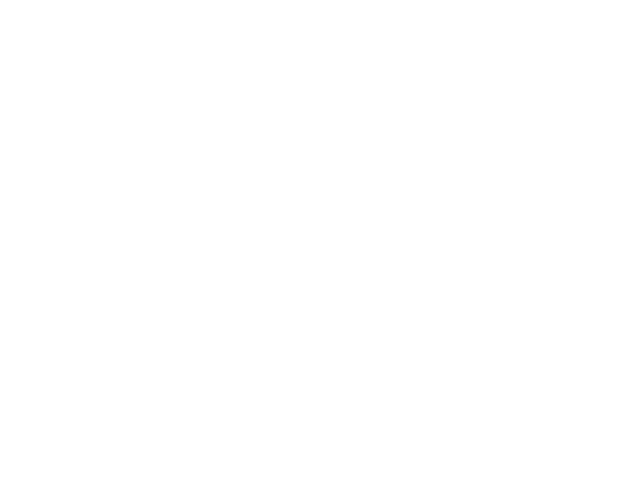

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)

ax[0].contour(x, y, values_2px)
ax[0].set_aspect('equal')
ax[1].contour(x, y, values_3px)
ax[1].set_aspect('equal')

The `contour` command in `matplotlib` produces a plot where the contour levels are not filled. We might want a filled contour plot instead, so we can use the `contourf` (f for filled) function instead.

We might also want a color bar to tell us the scale of the colors. The `contour` and `contourf` functions return a variable we can use for a colorbar. You should capture the output of the `contour` or `contourf` command and add a color bar to the figure using `fig.colorbar`.

<IPython.core.display.Javascript object>


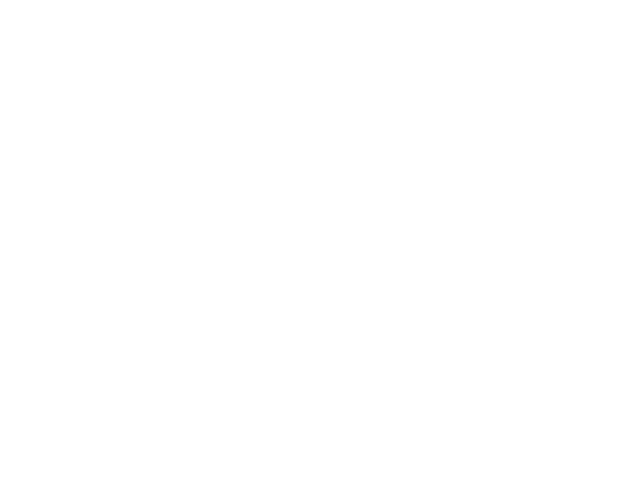

In [38]:
fig, ax = plt.subplots(1,2)

ax[0].contourf(x, y, values_2px)
ax[0].set_aspect('equal')
CS = ax[1].contourf(x, y, values_3px)
ax[1].set_aspect('equal')

fig.colorbar(CS)

## Picking a Color Map
When creating a contour plot, you can also specify the color map you would like to use. You can see a list of built-in color maps for matplotlib [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

There are different classes of colormaps you might want to choose depending on the type of data you are looking at. Matplotlib gives the following guidance (see, e.g., [Moreland](http://www.kennethmoreland.com/color-maps/ColorMapsExpanded.pdf)):

1. **Sequential:** change in lightness and often saturation of color incrementally, often using a single hue; should be used for representing information that has ordering.

2. **Diverging:** change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color; should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.

3. **Cyclic:** change in lightness of two different colors that meet in the middle and beginning/end at an unsaturated color; should be used for values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.

4. **Qualitative:** often are miscellaneous colors; should be used to represent information which does not have ordering or relationships.

This data has both positive and negative values, which zero representing a node for the wavefunction. Take a moment and think of which class of color maps would be best for this type of data.

After some consideration, you should arrive at the conclusion that we should use a **diverging** colormap to best represent the orbital values. We will use the colormap “RdBu”.

At the same time, we will use some options of `fig.colorbar()` to improve the colorbar placement.

<IPython.core.display.Javascript object>


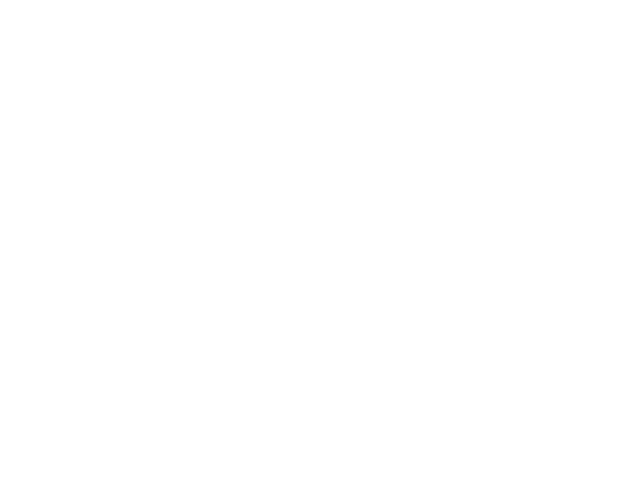

In [39]:
fig, ax = plt.subplots(1,2)

ax[0].contourf(x, y, values_2px, cmap="RdBu")
ax[0].set_aspect('equal')
CS = ax[1].contourf(x, y, values_3px, cmap="RdBu")
ax[1].set_aspect('equal')

fig.colorbar(CS, ax=ax[:], location='bottom')

## Number of Contour Colors - Levels
Our plot is only showing six different colors by default, but we might be interested in finger-grain detail of our plot. We will want to specify how many colors, or how many “levels” we want to use in our colormap.

Unfortunately, we can’t just say how many levels we want. We have to give numeric values where we would like levels to occur. For example, if our data ranges from -10 to 10 and we want 20 evenly spaced levels (or, a color for every integer), we would need to give matplotlib a list of all the integers to use as levels.

For our data, we would likely want to start at the minimum value and end at the maximum value. We can use the function `numpy.linspace` to generate evenly spaced numbers between the minimum and maximum, but first we need to calculate the minimum and maximum of our orbital values.

In [40]:
min_2px = numpy.min(values_2px)
max_2px = numpy.max(values_2px)
min_3px = numpy.min(values_3px)
max_3px = numpy.max(values_3px)
min_common = min(min_2px,min_3px)
max_common = max(max_2px,max_3px)
levels = numpy.linspace(min_common, max_common, 30)
levels

array([-0.07338133, -0.06832055, -0.06325977, -0.05819899, -0.05313821,
       -0.04807742, -0.04301664, -0.03795586, -0.03289508, -0.0278343 ,
       -0.02277352, -0.01771274, -0.01265195, -0.00759117, -0.00253039,
        0.00253039,  0.00759117,  0.01265195,  0.01771274,  0.02277352,
        0.0278343 ,  0.03289508,  0.03795586,  0.04301664,  0.04807742,
        0.05313821,  0.05819899,  0.06325977,  0.06832055,  0.07338133])

We pass this list of numbers to the `levels` argument in the `contourf` function. Now, we will use 30 colors on our plot.

The last consideration for this plot is the numbers in our color bar. We might want fewer labels and fewer decimal places. To specify our number of decimal places, we will use a `format` argument in the `colorbar` command. We can tell `matplotlib` where to label the color bar by giving a list of values. We will generate 6 evenly spaced values again using `linspace` and use those as tick marks.

<IPython.core.display.Javascript object>


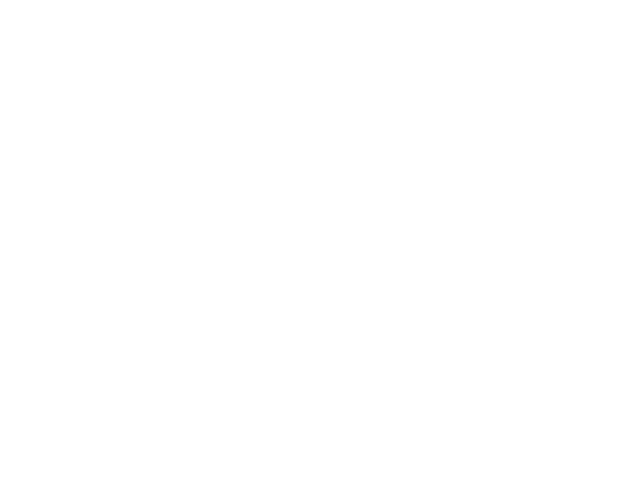

In [41]:
ticks = numpy.linspace(min_common, max_common, 6)

fig, ax = plt.subplots(1,2)

ax[0].contourf(x, y, values_2px, cmap="RdBu", levels=levels)
ax[0].set_aspect('equal')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
CS = ax[1].contourf(x, y, values_3px, cmap="RdBu", levels=levels)
ax[1].set_aspect('equal')
ax[1].set_xlabel('x')

fig.colorbar(CS, ax=ax[:], location='bottom', format="%.3f", ticks=ticks)

## Graphing a 2D slice *f(x,y)* on a surface plot
We can plot the same function of two variables *f(x,y)* as a standard, 3D surface plot: *z=f(x,y)*. To view the 3D plot in 2D, we need to project it, and the default `matplotlib` projection is OK for most purposes.

<IPython.core.display.Javascript object>


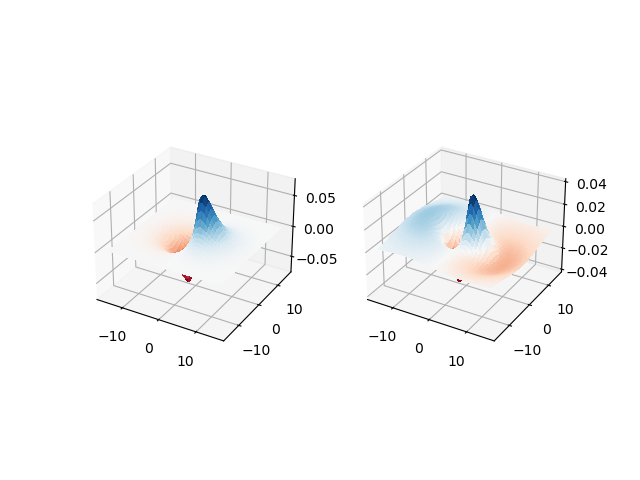

In [42]:
# a "meta-function" needed to have interactive plots in the Jupyter notebook
%matplotlib notebook 

fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

# Plot the surface. Note that we plot the values as a function of 2D grids Xgrid, Ygrid instead of 1D coordinates x,y
surf0 = ax[0].plot_surface(Xgrid, Ygrid, values_2px, cmap="RdBu",
                       linewidth=0, antialiased=False)
surf1 = ax[1].plot_surface(Xgrid, Ygrid, values_3px, cmap="RdBu",
                       linewidth=0, antialiased=False)

fig.show()

## Graphing an orbital contour (isosurface) on a 3D plot
The most common picture of a *2p* orbital displays two differently colored lobes in 3D. What this picture does is showing two specific *isosurfaces* - contours on a 3D contour map, connecting all points *(x,y,z)* for which *f(x,y,z)* shares the same value *+a* (for the positive lobe) or the same value *-a* (for the negative lobe).

To produce such a plot, we have some preparation to do - so far we used the values of an orbital on regularly spaced grid points - this is how the arrays such as *values_2px* were constructed. However, if we just examine the values at grid points, we would have to be extremely lucky (or extremely symmetric) to find equal numbers. The contours we are looking for pass in between the grid points, and we have to *interpolate* the function to locate the contours.

Let's stick to our grid of *(x,y)* points but perform an interpolation along the *z* axis to find all points with a specific value *f(x,y,z)*. We expect to find two points with a given positive value (the upper and lower surface of the positive lobe) and two points with a given negative value (the upper and lower surface of the negative lobe). Let's store the values of *z* (as functions of *(x,y)*) for these four surfaces in arrays `positive_lobe_up`, `positive_lobe_down`, `negative_lobe_up`, and `negative_lobe_down`. If no suitable *z* value is found for a given *(x,y)*, we want the value of the array to be `numpy.nan` so that it will not be plotted (if we initialize the arrays to zero, we will get a horizontal plane plotted together with the orbital shape, and we don't want this).

**Warning:** Executing this cell might take a minute or two.

In [43]:
iso_value = 0.01  # we will plot f(x,y,z)=+- 0.01
zmin = -10.0
zmax = 10.0
zstep = 0.1 # search the z values in this range
# First, we save all interpolated point as a list. Then, we will convert the list to a numpy array.
positive_lobe_up = numpy.empty((201,201))
positive_lobe_up.fill(numpy.nan)
positive_lobe_down = numpy.empty((201,201))
positive_lobe_down.fill(numpy.nan)
negative_lobe_up = numpy.empty((201,201))
negative_lobe_up.fill(numpy.nan)
negative_lobe_down = numpy.empty((201,201))
negative_lobe_down.fill(numpy.nan)
for xind, x0 in enumerate(numpy.linspace(-10.0, 10.0, 201)):
    for yind, y0 in enumerate(numpy.linspace(-10.0, 10.0, 201)):
        z0 = zmin
        fold = orb2px(x0, y0, z0)
        while z0 < zmax:
            z0 += zstep
            fnew = orb2px(x0, y0, z0)
            if max(fold,fnew) >= iso_value and min(fold,fnew) <= iso_value:
# the positive lobe is somewhere between z0 and z0-zstep, let's do linear interpolation
                zint = z0 * abs((iso_value-fold)/(fnew-fold)) + (z0 - zstep) * abs((iso_value-fnew)/(fnew-fold))
                # print("+",fold,fnew,z0,zint,orb2px(x0, y0, zint))
                if numpy.isnan(positive_lobe_up[xind,yind]):
                    positive_lobe_up[xind,yind] = zint
                elif positive_lobe_up[xind,yind] >= zint:
                    positive_lobe_down[xind,yind] = zint
                else:
                    positive_lobe_down[xind,yind] = positive_lobe_up[xind,yind]
                    positive_lobe_up[xind,yind] = zint
            if max(fold,fnew) >= -iso_value and min(fold,fnew) <= -iso_value:
# the negative lobe is somewhere between z0 and z0-zstep, let's do linear interpolation
                zint = z0 * abs((-iso_value-fold)/(fnew-fold)) + (z0 - zstep) * abs((-iso_value-fnew)/(fnew-fold))
                # print("-",fold,fnew,z0,zint,orb2px(x0, y0, zint))
                if numpy.isnan(negative_lobe_up[xind,yind]):
                    negative_lobe_up[xind,yind] = zint
                elif negative_lobe_up[xind,yind] >= zint:
                    negative_lobe_down[xind,yind] = zint
                else:
                    negative_lobe_down[xind,yind] = negative_lobe_up[xind,yind]
                    negative_lobe_up[xind,yind] = zint
            fold = fnew

The positive and negative lobes can now be plotted on a suitable mesh grid. We will print the two positive half-lobes with one color and two negative half-lobes with another color.

<IPython.core.display.Javascript object>


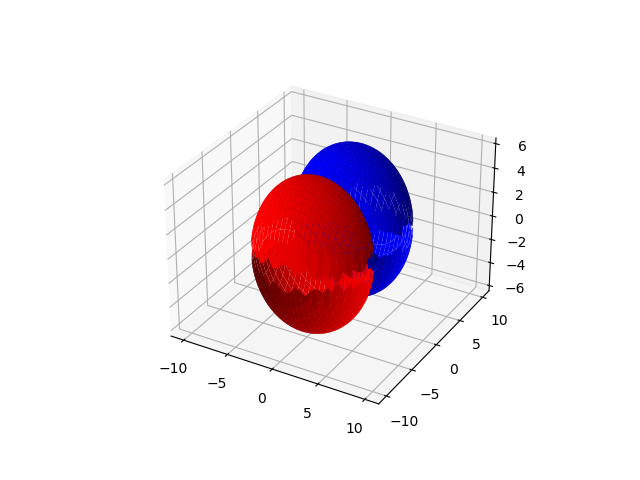

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

In [44]:
Xgr,Ygr = numpy.meshgrid(numpy.linspace(-10.0, 10.0, 201), numpy.linspace(-10.0, 10.0, 201))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.plot_surface(Xgr, Ygr, positive_lobe_up, color='b')
ax.plot_surface(Xgr, Ygr, positive_lobe_down, color='b')
ax.plot_surface(Xgr, Ygr, negative_lobe_up, color='r')
ax.plot_surface(Xgr, Ygr, negative_lobe_down, color='r')

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.show()

Not bad, but... the upper and lower half-lobes are separate from each other, like broken eggshells. Can we glue them together? Yes, if we change the half-lobe values *on their edges* from `numpy.nan` to zero.

In [ ]:
patched_positive_lobe_up = numpy.empty((201,201))
patched_positive_lobe_up.fill(numpy.nan)
patched_positive_lobe_down = numpy.empty((201,201))
patched_positive_lobe_down.fill(numpy.nan)
patched_negative_lobe_up = numpy.empty((201,201))
patched_negative_lobe_up.fill(numpy.nan)
patched_negative_lobe_down = numpy.empty((201,201))
patched_negative_lobe_down.fill(numpy.nan)

for xind in range(1,200):
    for yind in range(1,200): # we don't want edge points of the 2D array, only 1,...,199
        if numpy.isnan(positive_lobe_up[xind,yind]):
            # this point is outside the lobe, check if any neighboring point is on the lobe
            if numpy.isnan(positive_lobe_up[xind-1,yind]) and numpy.isnan(positive_lobe_up[xind+1,yind]
                ) and numpy.isnan(positive_lobe_up[xind,yind-1]) and numpy.isnan(positive_lobe_up[xind,yind+1]):
                patched_positive_lobe_up[xind,yind] = positive_lobe_up[xind,yind]
                patched_positive_lobe_down[xind,yind] = positive_lobe_down[xind,yind]
            else:
                patched_positive_lobe_up[xind,yind] = 0.0
                patched_positive_lobe_down[xind,yind] = 0.0
        else:
            patched_positive_lobe_up[xind,yind] = positive_lobe_up[xind,yind]
            patched_positive_lobe_down[xind,yind] = positive_lobe_down[xind,yind]
        if numpy.isnan(negative_lobe_up[xind,yind]):
            # this point is outside the lobe, check if any neighboring point is on the lobe
            if numpy.isnan(negative_lobe_up[xind-1,yind]) and numpy.isnan(negative_lobe_up[xind+1,yind]
                ) and numpy.isnan(negative_lobe_up[xind,yind-1]) and numpy.isnan(negative_lobe_up[xind,yind+1]):
                patched_negative_lobe_up[xind,yind] = negative_lobe_up[xind,yind]
                patched_negative_lobe_down[xind,yind] = negative_lobe_down[xind,yind]
            else:
                patched_negative_lobe_up[xind,yind] = 0.0
                patched_negative_lobe_down[xind,yind] = 0.0
        else:
            patched_negative_lobe_up[xind,yind] = negative_lobe_up[xind,yind]
            patched_negative_lobe_down[xind,yind] = negative_lobe_down[xind,yind]

We patched the edges of all four half-lobes with zeros. Now we can try plotting them again.

In [ ]:
Xgr,Ygr = numpy.meshgrid(numpy.linspace(-10.0, 10.0, 201), numpy.linspace(-10.0, 10.0, 201))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the surface
ax.plot_surface(Xgr, Ygr, patched_positive_lobe_up, color='b')
ax.plot_surface(Xgr, Ygr, patched_positive_lobe_down, color='b')
ax.plot_surface(Xgr, Ygr, patched_negative_lobe_up, color='r')
ax.plot_surface(Xgr, Ygr, patched_negative_lobe_down, color='r')

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.show()

Not perfect, but good enough (and can be made better by denser sampling if you have time for that).